# Optymalizacja VRP z użyciem ACO

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import exp

In [8]:
# Parsowanie pliku R101.txt
def load_solomon_instance(path):
    coords = []
    demands = []
    with open(path, 'r') as f:
        lines = f.readlines()[9:]
        for line in lines:
            if line.strip() == '':
                continue
            parts = line.split()
            coords.append((float(parts[1]), float(parts[2])))
            demands.append(int(parts[3]))
    return np.array(coords), np.array(demands)

In [9]:
# ACO dla VRP
class AntColony:
    def __init__(self, coords, num_ants=10, num_iterations=100, alpha=1.0, beta=5.0, rho=0.5, Q=100):
        self.coords = coords
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha  # Wpływ feromonów
        self.beta = beta    # Wpływ heurystyki (1/dystans)
        self.rho = rho      # Wsp. odparowania
        self.Q = Q
        self.num_nodes = len(coords)
        self.distances = self.compute_distances()
        self.pheromone = np.ones((self.num_nodes, self.num_nodes))

    def compute_distances(self):
        dist = np.zeros((self.num_nodes, self.num_nodes))
        for i in range(self.num_nodes):
            for j in range(self.num_nodes):
                if i != j:
                    dist[i][j] = np.linalg.norm(self.coords[i] - self.coords[j])
        return dist

    def run(self):
        best_distance = float('inf')
        best_path = []
        for iteration in range(self.num_iterations):
            all_paths = []
            all_distances = []
            for ant in range(self.num_ants):
                path = self.construct_solution()
                distance = self.path_length(path)
                all_paths.append(path)
                all_distances.append(distance)
                if distance < best_distance:
                    best_distance = distance
                    best_path = path
            self.update_pheromones(all_paths, all_distances)
            print(f"Iteracja {iteration+1}: Najlepszy dystans = {best_distance:.2f}")
        return best_path, best_distance

    def construct_solution(self):
        path = [0]
        unvisited = set(range(1, self.num_nodes))
        while unvisited:
            current = path[-1]
            probabilities = []
            for next_node in unvisited:
                tau = self.pheromone[current][next_node] ** self.alpha
                eta = (1 / self.distances[current][next_node]) ** self.beta
                probabilities.append(tau * eta)
            probabilities = np.array(probabilities)
            probabilities /= probabilities.sum()
            chosen = random.choices(list(unvisited), weights=probabilities, k=1)[0]
            path.append(chosen)
            unvisited.remove(chosen)
        path.append(0)  # Powrót do magazynu
        return path

    def path_length(self, path):
        return sum(self.distances[path[i]][path[i + 1]] for i in range(len(path) - 1))

    def update_pheromones(self, paths, distances):
        self.pheromone *= (1 - self.rho)
        for path, dist in zip(paths, distances):
            for i in range(len(path) - 1):
                self.pheromone[path[i]][path[i+1]] += self.Q / dist

In [10]:
# Wizualizacja
def plot_path(coords, path):
    x = [coords[i][0] for i in path]
    y = [coords[i][1] for i in path]
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o')
    plt.scatter(coords[0][0], coords[0][1], c='red', label='Depot')
    plt.title(" ")
    plt.legend()
    plt.grid()
    plt.show()

Iteracja 1: Najlepszy dystans = 173.46
Iteracja 2: Najlepszy dystans = 173.46
Iteracja 3: Najlepszy dystans = 168.51
Iteracja 4: Najlepszy dystans = 168.51
Iteracja 5: Najlepszy dystans = 168.51
Iteracja 6: Najlepszy dystans = 168.51
Iteracja 7: Najlepszy dystans = 168.51
Iteracja 8: Najlepszy dystans = 168.51
Iteracja 9: Najlepszy dystans = 168.51
Iteracja 10: Najlepszy dystans = 168.51
Iteracja 11: Najlepszy dystans = 168.51
Iteracja 12: Najlepszy dystans = 168.51
Iteracja 13: Najlepszy dystans = 168.51
Iteracja 14: Najlepszy dystans = 168.51
Iteracja 15: Najlepszy dystans = 168.51
Iteracja 16: Najlepszy dystans = 168.51
Iteracja 17: Najlepszy dystans = 168.51
Iteracja 18: Najlepszy dystans = 168.51
Iteracja 19: Najlepszy dystans = 168.51
Iteracja 20: Najlepszy dystans = 168.51
Iteracja 21: Najlepszy dystans = 168.51
Iteracja 22: Najlepszy dystans = 168.51
Iteracja 23: Najlepszy dystans = 168.51
Iteracja 24: Najlepszy dystans = 168.51
Iteracja 25: Najlepszy dystans = 168.51
Iteracja 

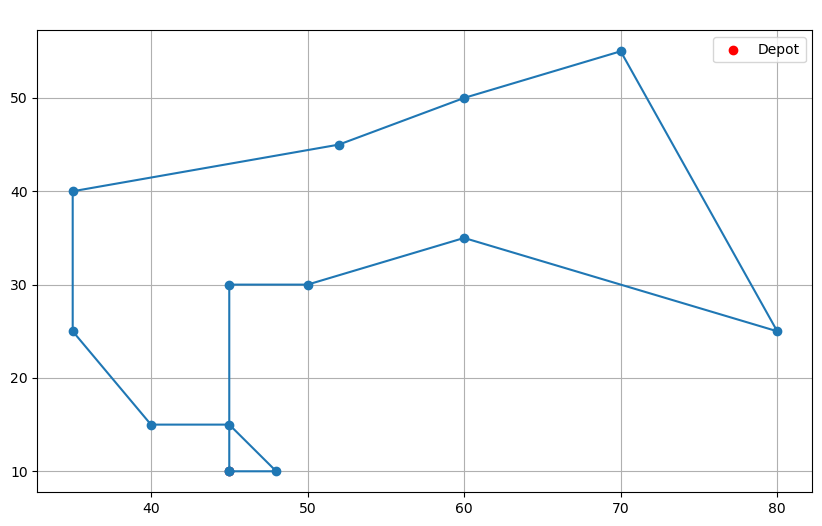

In [11]:
# Wywołanie algorytmu
if __name__ == "__main__":
    path_to_file = "R101.txt"  # Upewnij się, że plik R101.txt jest w tym samym folderze
    coords, demands = load_solomon_instance(path_to_file)
    aco = AntColony(coords, num_ants=20, num_iterations=50)
    best_path, best_dist = aco.run()
    print(f"Najlepsza trasa: {best_path}\nDługość: {best_dist:.2f}")
    plot_path(coords, best_path)


Iteracja 1: Najlepszy dystans = 173.46
Iteracja 2: Najlepszy dystans = 168.51
Iteracja 3: Najlepszy dystans = 168.51
Iteracja 4: Najlepszy dystans = 168.51
Iteracja 5: Najlepszy dystans = 168.51
Iteracja 6: Najlepszy dystans = 168.51
Iteracja 7: Najlepszy dystans = 168.51
Iteracja 8: Najlepszy dystans = 168.51
Iteracja 9: Najlepszy dystans = 168.51
Iteracja 10: Najlepszy dystans = 168.51
Iteracja 11: Najlepszy dystans = 168.51
Iteracja 12: Najlepszy dystans = 168.51
Iteracja 13: Najlepszy dystans = 168.51
Iteracja 14: Najlepszy dystans = 168.51
Iteracja 15: Najlepszy dystans = 168.51
Iteracja 16: Najlepszy dystans = 168.51
Iteracja 17: Najlepszy dystans = 168.51
Iteracja 18: Najlepszy dystans = 168.51
Iteracja 19: Najlepszy dystans = 168.51
Iteracja 20: Najlepszy dystans = 168.51
Iteracja 21: Najlepszy dystans = 168.51
Iteracja 22: Najlepszy dystans = 168.51
Iteracja 23: Najlepszy dystans = 168.51
Iteracja 24: Najlepszy dystans = 168.51
Iteracja 25: Najlepszy dystans = 168.51
Iteracja 

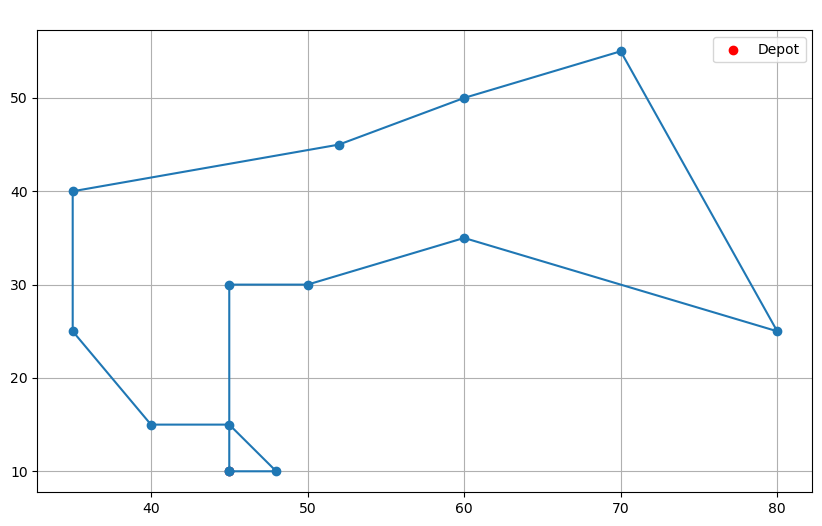

In [6]:
#próba poszukiwanie globalnego minimum poprzez uruchomienie 100 razy algorytmu
if __name__ == "__main__":
    path_to_file = "R101.txt" 
    coords, demands = load_solomon_instance(path_to_file)
    for i in range(100):
        aco = AntColony(coords, num_ants=20, num_iterations=50)
        best_path, best_dist = aco.run()
        print(f"Najlepsza trasa: {best_path}\nDługość: {best_dist:.2f}")

    plot_path(coords, best_path)
